In [194]:
import pandas as pd
from matplotlib import pyplot as plt

In [195]:
df = pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [196]:
df = df.drop(['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [197]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


Text(0, 0.5, 'Salary')

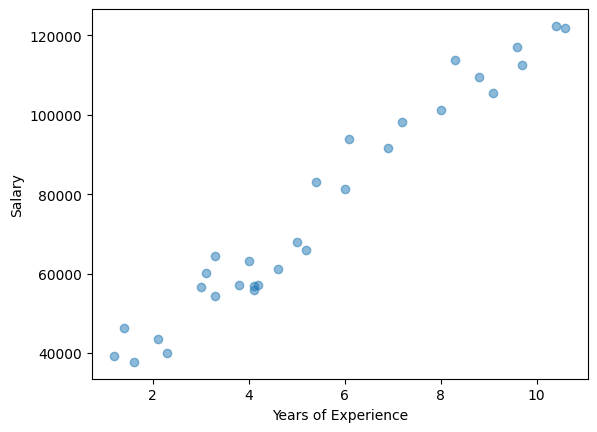

In [198]:
plt.scatter(df.YearsExperience, df.Salary, alpha=0.5)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [199]:
def estimated_salary(w, x, b):
    return w * x + b

In [200]:
w = 10
b = 60000

In [201]:
print(estimated_salary(w, 4, b))

60040


In [202]:
experience = df.YearsExperience
salary = estimated_salary(w, experience, b)
print(salary)

0     60012.0
1     60014.0
2     60016.0
3     60021.0
4     60023.0
5     60030.0
6     60031.0
7     60033.0
8     60033.0
9     60038.0
10    60040.0
11    60041.0
12    60041.0
13    60042.0
14    60046.0
15    60050.0
16    60052.0
17    60054.0
18    60060.0
19    60061.0
20    60069.0
21    60072.0
22    60080.0
23    60083.0
24    60088.0
25    60091.0
26    60096.0
27    60097.0
28    60104.0
29    60106.0
Name: YearsExperience, dtype: float64


Text(0, 0.5, 'Salary')

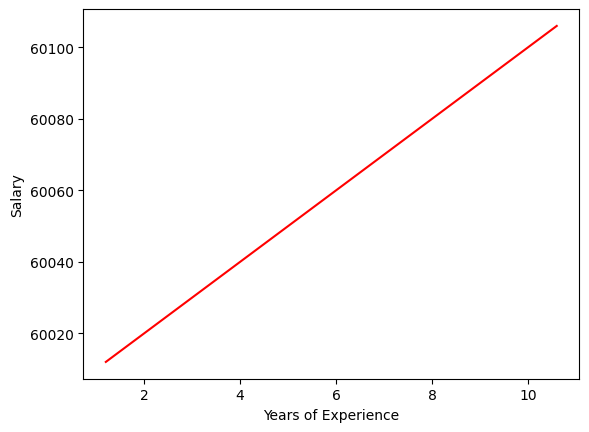

In [203]:
plt.plot(experience, salary, 'r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

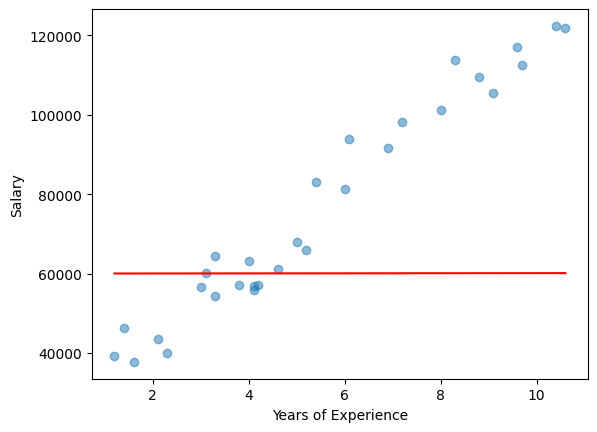

In [204]:
plt.plot(experience, salary, 'r')

plt.scatter(df.YearsExperience, df.Salary, alpha=0.5)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [209]:
import numpy as np


def calculate_error(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [210]:
def try_parameters(w, b):
    sal = df.Salary
    exp = df.YearsExperience

    est_sal = estimated_salary(w, exp, b)

    plt.plot(exp, est_sal, 'r')

    plt.scatter(exp, sal, alpha=0.5)
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.legend(["Estimated", "Actual"])

    loss = calculate_error(sal, est_sal)
    print("Estimated loss: ", loss)

Estimated loss:  74953.40218028799


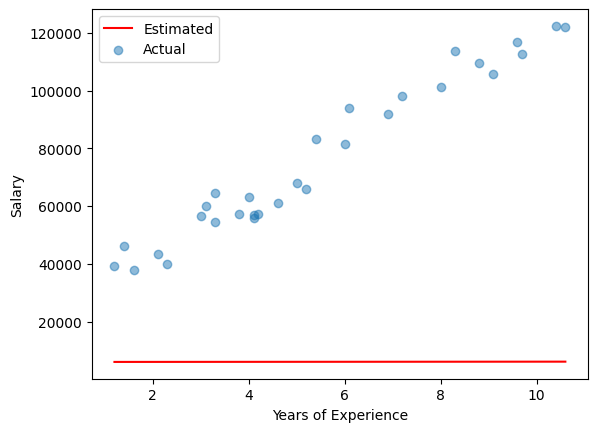

In [214]:
try_parameters(10, 6000)

Estimated loss:  6043.306578355925


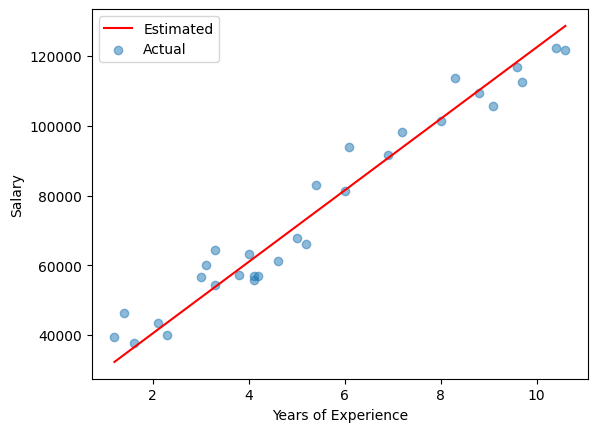

In [215]:
try_parameters(10250, 20000)

In [216]:
print(estimated_salary(10250, 0, 20000))

20000


In [245]:
from sklearn.linear_model import LinearRegression

In [252]:
inputs = df[["YearsExperience"]]
targets = df.Salary
print(inputs.shape)
print(targets.shape)

(30, 1)
(30,)


In [247]:
model = LinearRegression()
model.fit(inputs, targets)
model.predict([[2], [4], [6]])

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([43748.12860943, 62648.05325234, 81547.97789525])

In [248]:
predictions = model.predict(inputs)
predictions

array([ 36188.15875227,  38078.15121656,  39968.14368085,  44693.12484158,
        46583.11730587,  53198.09093089,  54143.08716303,  56033.07962732,
        56033.07962732,  60758.06078805,  62648.05325234,  63593.04948449,
        63593.04948449,  64538.04571663,  68318.03064522,  72098.0155738 ,
        73988.00803809,  75878.00050238,  81547.97789525,  82492.9741274 ,
        90052.94398456,  92887.932681  , 100447.90253816, 103282.8912346 ,
       108007.87239533, 110842.86109176, 115567.84225249, 116512.83848464,
       123127.81210966, 125017.80457395])

In [249]:
slope = model.coef_
intercept = model.intercept_

print(slope)
print(intercept)

[9449.96232146]
24848.203966523222


In [250]:
calculate_error(targets, predictions)

5592.043608760662

Estimated loss:  5592.043608760662


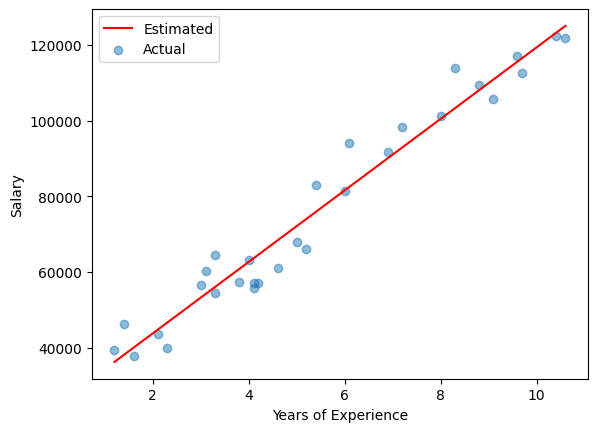

In [251]:
try_parameters(slope, intercept)